In [327]:
# Steps

# 0. preprocessing + EDA + feature engineering
# 1. Etract input and output cols
# 2. Scale the values
# 3.train test split
# 4. train the model
# 5. evaluate model/model selection
# 6. deploy the model 

In [328]:
import numpy as np
import pandas as pd

In [329]:
df = pd.read_csv("placement.csv", index_col=0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [330]:
df.shape

(100, 3)

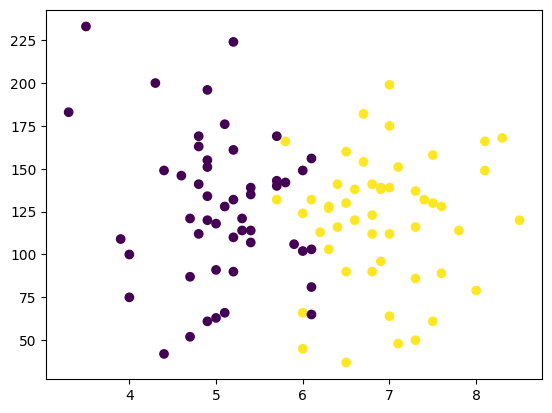

In [331]:
import matplotlib.pyplot as plt
plt.scatter(df["cgpa"], df["iq"], c = df["placement"])

In [332]:
x = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [333]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [335]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [336]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [337]:
# model training
clf.fit(x_train, y_train)

LogisticRegression()

In [338]:
y_predict = clf.predict(x_test)

In [339]:
y_test

9     0
87    1
16    0
5     1
70    1
8     0
51    0
90    1
34    0
63    1
Name: placement, dtype: int64

In [340]:
from sklearn.metrics import accuracy_score

In [341]:
accuracy_score(y_test, y_predict)

0.8

In [343]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

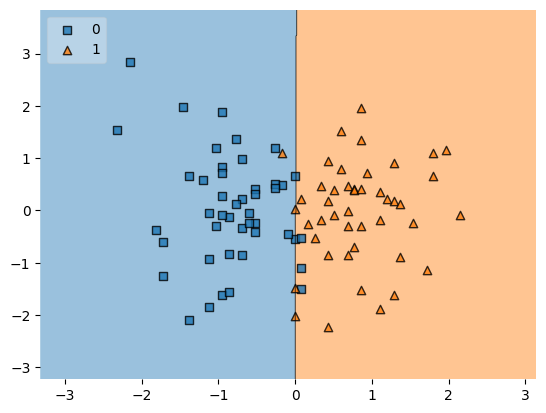

In [345]:
plot_decision_regions(x_train, y_train.values, clf = clf, legend = 2)

In [346]:
import pickle

In [347]:
pickle.dump(clf, open("model.pkl", "wb"))